In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
from catboost import Pool

In [140]:
train = pd.read_csv(r'train_BRCpofr.csv')
test = pd.read_csv(r'test_koRSKBP.csv')

train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [141]:
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

/Users/satyasriallaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

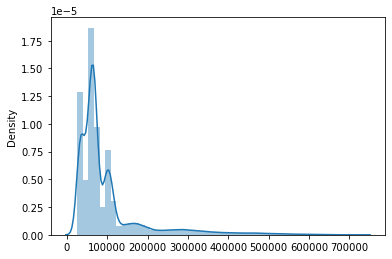

In [142]:
#distribution of target variable
sns.distplot(x=train['cltv'])

In [143]:
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


/Users/satyasriallaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/satyasriallaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

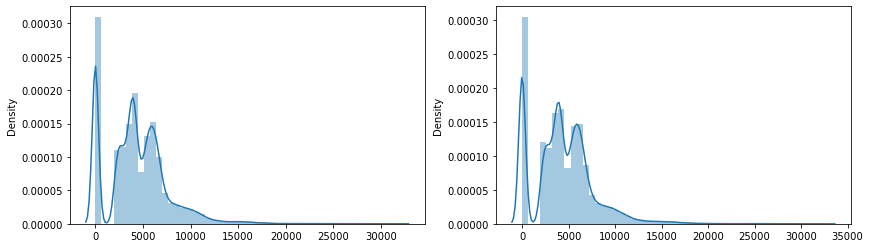

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

sns.distplot(x=train['claim_amount'],ax=ax[0])
sns.distplot(x=test['claim_amount'],ax = ax[1])

/Users/satyasriallaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

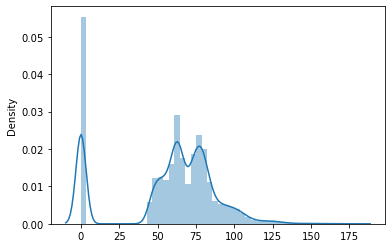

In [145]:
sns.distplot(x=np.sqrt(train['claim_amount']))

/Users/satyasriallaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

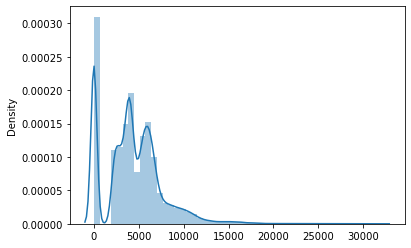

In [146]:
sns.distplot(x=np.sqrt(train['claim_amount'])**2)

In [147]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


<AxesSubplot:xlabel='type_of_policy', ylabel='cltv'>

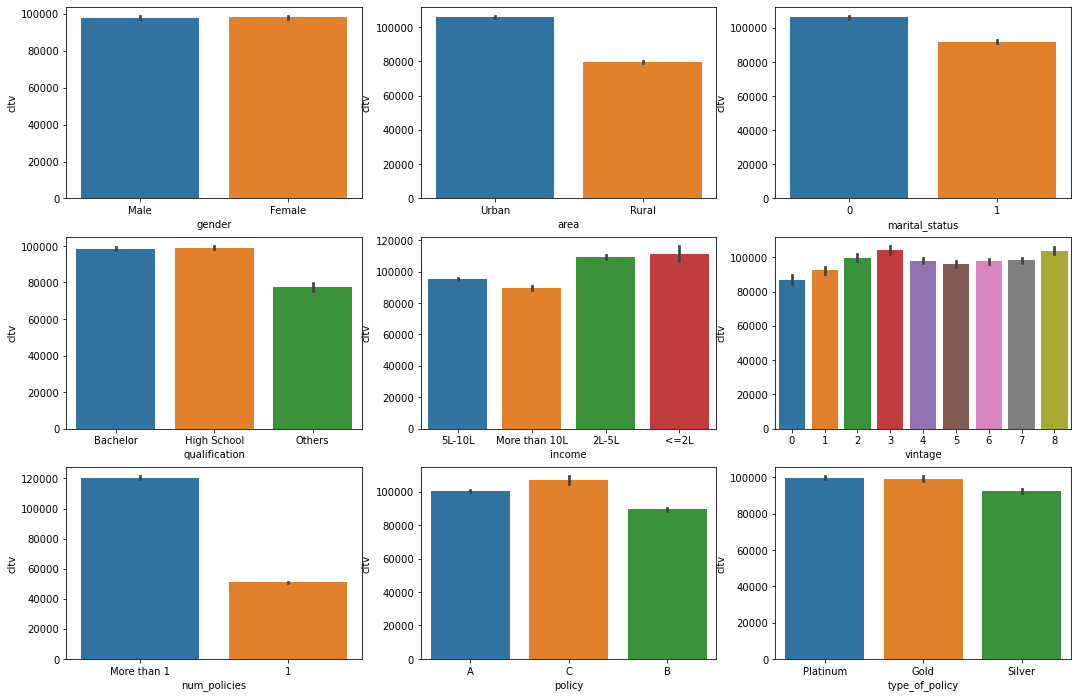

In [148]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,12))

sns.barplot(x=train['gender'],y=train['cltv'],ax=ax[0][0])
sns.barplot(x=train['area'],y=train['cltv'],ax = ax[0][1])
sns.barplot(x=train['qualification'],y=train['cltv'], ax = ax[1][0])
sns.barplot(x=train['income'],y=train['cltv'], ax = ax[1][1])
sns.barplot(x=train['marital_status'],y=train['cltv'],ax=ax[0][2])
sns.barplot(x=train['vintage'],y=train['cltv'],ax=ax[1][2])
sns.barplot(x=train['num_policies'],y=train['cltv'],ax=ax[2][0])
sns.barplot(x=train['policy'],y=train['cltv'],ax=ax[2][1])
sns.barplot(x=train['type_of_policy'],y=train['cltv'],ax=ax[2][2])


In [149]:
train['vintage'] = train['vintage'].astype(str)
test['vintage'] = test['vintage'].astype(str)

train['marital_status'] = train['marital_status'].replace({0:'single',
                                                         1:'married'})
test['marital_status'] = test['marital_status'].replace({0:'single',
                                                         1:'married'})

In [150]:
X = train.drop(['cltv','id'],axis=1)
y = train[['cltv']]

/Users/satyasriallaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

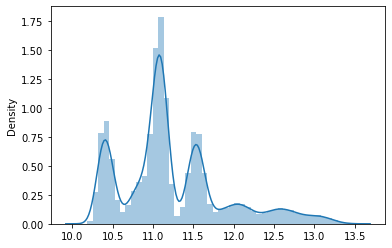

In [151]:
#to remove skewed distribution
sns.distplot(x=np.log(y))

In [152]:
y_log = np.log(y)

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [154]:
cat_columns = X.select_dtypes(include=['object']).columns.to_list()
print("Names of categorical columns:",cat_columns)
cat_features = [X.columns.get_loc(col) for col in cat_columns]
print("Locations of categorical columns:",cat_features)

Names of categorical columns: ['gender', 'area', 'qualification', 'income', 'marital_status', 'num_policies', 'policy', 'type_of_policy']
Locations of categorical columns: [0, 1, 2, 3, 4, 7, 8, 9]


In [155]:
cat_features = X.columns[np.where(X.dtypes != float)[0]].values.tolist()
print(cat_features)
# ['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

# make sure that the categorical features are encoded as strings
X[cat_features] = X[cat_features].astype(str)

['gender', 'area', 'qualification', 'income', 'marital_status', 'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy']


In [156]:
train_data = Pool(data=X_train,label=y_train,
                 cat_features = cat_columns)
test_data = Pool(data=X_test,label=y_test,cat_features=cat_columns)

# Build model

In [157]:
cat_model = CatBoostRegressor(loss_function='RMSE',use_best_model=True)
cat_model.fit( train_data,
               eval_set=test_data,
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.101406
0:	learn: 89435.4462195	test: 87618.2759285	best: 87618.2759285 (0)	total: 20.6ms	remaining: 20.5s
1:	learn: 88319.8811113	test: 86492.1188307	best: 86492.1188307 (1)	total: 39.1ms	remaining: 19.5s
2:	learn: 87396.9707062	test: 85563.6534701	best: 85563.6534701 (2)	total: 53.3ms	remaining: 17.7s
3:	learn: 86639.8330254	test: 84812.2255879	best: 84812.2255879 (3)	total: 66.6ms	remaining: 16.6s
4:	learn: 86028.5502462	test: 84193.9416398	best: 84193.9416398 (4)	total: 78.9ms	remaining: 15.7s
5:	learn: 85540.8801638	test: 83703.5270614	best: 83703.5270614 (5)	total: 93.3ms	remaining: 15.5s
6:	learn: 85127.4369675	test: 83286.5036536	best: 83286.5036536 (6)	total: 107ms	remaining: 15.2s
7:	learn: 84797.1546453	test: 82945.6452615	best: 82945.6452615 (7)	total: 121ms	remaining: 15s
8:	learn: 84517.9762927	test: 82684.2441089	best: 82684.2441089 (8)	total: 132ms	remaining: 14.5s
9:	learn: 84284.2548251	test: 82443.1332992	best: 82443.1332992 (9)	total: 146ms	rem

87:	learn: 83006.5762570	test: 81406.7200273	best: 81401.7388256 (43)	total: 991ms	remaining: 10.3s
88:	learn: 83004.4106844	test: 81407.3777295	best: 81401.7388256 (43)	total: 1s	remaining: 10.3s
89:	learn: 83002.6921434	test: 81408.0774639	best: 81401.7388256 (43)	total: 1.02s	remaining: 10.3s
90:	learn: 83000.2754246	test: 81407.1480559	best: 81401.7388256 (43)	total: 1.03s	remaining: 10.3s
91:	learn: 82998.1501582	test: 81408.2706741	best: 81401.7388256 (43)	total: 1.05s	remaining: 10.3s
92:	learn: 82996.6960990	test: 81408.0370619	best: 81401.7388256 (43)	total: 1.06s	remaining: 10.3s
93:	learn: 82994.7613957	test: 81409.4197927	best: 81401.7388256 (43)	total: 1.07s	remaining: 10.3s
94:	learn: 82992.2984973	test: 81409.7754324	best: 81401.7388256 (43)	total: 1.08s	remaining: 10.3s
95:	learn: 82991.9090022	test: 81409.9304661	best: 81401.7388256 (43)	total: 1.09s	remaining: 10.3s
96:	learn: 82987.2300013	test: 81409.5871973	best: 81401.7388256 (43)	total: 1.1s	remaining: 10.3s
97:	

182:	learn: 82761.8946409	test: 81438.2458942	best: 81401.7388256 (43)	total: 2.2s	remaining: 9.84s
183:	learn: 82759.7485054	test: 81436.8009926	best: 81401.7388256 (43)	total: 2.22s	remaining: 9.84s
184:	learn: 82759.1469503	test: 81436.6115857	best: 81401.7388256 (43)	total: 2.23s	remaining: 9.82s
185:	learn: 82758.1581110	test: 81436.5820580	best: 81401.7388256 (43)	total: 2.24s	remaining: 9.81s
186:	learn: 82756.4723676	test: 81435.3776831	best: 81401.7388256 (43)	total: 2.26s	remaining: 9.81s
187:	learn: 82754.5722983	test: 81435.1305714	best: 81401.7388256 (43)	total: 2.27s	remaining: 9.79s
188:	learn: 82751.8805856	test: 81435.2222278	best: 81401.7388256 (43)	total: 2.28s	remaining: 9.78s
189:	learn: 82750.9985008	test: 81435.4868525	best: 81401.7388256 (43)	total: 2.29s	remaining: 9.77s
190:	learn: 82750.4047290	test: 81435.4293326	best: 81401.7388256 (43)	total: 2.3s	remaining: 9.75s
191:	learn: 82750.0355473	test: 81435.5492454	best: 81401.7388256 (43)	total: 2.31s	remaining

265:	learn: 82646.7517031	test: 81439.1327322	best: 81401.7388256 (43)	total: 3.22s	remaining: 8.87s
266:	learn: 82645.1816913	test: 81438.1018244	best: 81401.7388256 (43)	total: 3.23s	remaining: 8.86s
267:	learn: 82640.2264938	test: 81435.9250445	best: 81401.7388256 (43)	total: 3.25s	remaining: 8.86s
268:	learn: 82639.1136810	test: 81436.4085885	best: 81401.7388256 (43)	total: 3.26s	remaining: 8.85s
269:	learn: 82637.4895931	test: 81436.3908846	best: 81401.7388256 (43)	total: 3.27s	remaining: 8.84s
270:	learn: 82637.3481214	test: 81435.9958222	best: 81401.7388256 (43)	total: 3.28s	remaining: 8.82s
271:	learn: 82635.2731698	test: 81434.3945684	best: 81401.7388256 (43)	total: 3.29s	remaining: 8.8s
272:	learn: 82631.5988382	test: 81434.0210291	best: 81401.7388256 (43)	total: 3.3s	remaining: 8.79s
273:	learn: 82628.7173232	test: 81432.5517591	best: 81401.7388256 (43)	total: 3.31s	remaining: 8.78s
274:	learn: 82627.3524723	test: 81433.1028571	best: 81401.7388256 (43)	total: 3.33s	remaining

360:	learn: 82466.1586492	test: 81464.8035583	best: 81401.7388256 (43)	total: 4.45s	remaining: 7.87s
361:	learn: 82462.8589790	test: 81464.4560762	best: 81401.7388256 (43)	total: 4.46s	remaining: 7.86s
362:	learn: 82461.7166024	test: 81464.3059501	best: 81401.7388256 (43)	total: 4.47s	remaining: 7.85s
363:	learn: 82460.9634658	test: 81464.2131007	best: 81401.7388256 (43)	total: 4.49s	remaining: 7.84s
364:	learn: 82452.2700294	test: 81461.0813922	best: 81401.7388256 (43)	total: 4.5s	remaining: 7.84s
365:	learn: 82450.8462150	test: 81460.5529968	best: 81401.7388256 (43)	total: 4.52s	remaining: 7.82s
366:	learn: 82449.1659735	test: 81460.3710580	best: 81401.7388256 (43)	total: 4.54s	remaining: 7.82s
367:	learn: 82447.6353992	test: 81460.5497498	best: 81401.7388256 (43)	total: 4.55s	remaining: 7.81s
368:	learn: 82446.2080950	test: 81460.7043561	best: 81401.7388256 (43)	total: 4.56s	remaining: 7.8s
369:	learn: 82445.2863087	test: 81460.5465152	best: 81401.7388256 (43)	total: 4.57s	remaining

450:	learn: 82314.3039136	test: 81469.0474643	best: 81401.7388256 (43)	total: 5.69s	remaining: 6.92s
451:	learn: 82313.6407571	test: 81469.3628865	best: 81401.7388256 (43)	total: 5.7s	remaining: 6.92s
452:	learn: 82312.9102510	test: 81470.0710357	best: 81401.7388256 (43)	total: 5.72s	remaining: 6.91s
453:	learn: 82312.1418559	test: 81469.4529612	best: 81401.7388256 (43)	total: 5.73s	remaining: 6.89s
454:	learn: 82310.4653547	test: 81469.3033239	best: 81401.7388256 (43)	total: 5.74s	remaining: 6.88s
455:	learn: 82306.4319783	test: 81472.9707859	best: 81401.7388256 (43)	total: 5.76s	remaining: 6.87s
456:	learn: 82306.0805677	test: 81472.9625503	best: 81401.7388256 (43)	total: 5.77s	remaining: 6.86s
457:	learn: 82300.6434610	test: 81473.0375862	best: 81401.7388256 (43)	total: 5.79s	remaining: 6.85s
458:	learn: 82300.1763419	test: 81473.0635451	best: 81401.7388256 (43)	total: 5.8s	remaining: 6.84s
459:	learn: 82296.0994327	test: 81474.7006157	best: 81401.7388256 (43)	total: 5.82s	remaining

538:	learn: 82181.7724360	test: 81499.0220677	best: 81401.7388256 (43)	total: 6.93s	remaining: 5.93s
539:	learn: 82176.8066666	test: 81498.1227368	best: 81401.7388256 (43)	total: 6.95s	remaining: 5.92s
540:	learn: 82176.3310888	test: 81498.1481409	best: 81401.7388256 (43)	total: 6.96s	remaining: 5.9s
541:	learn: 82175.3593119	test: 81498.1895444	best: 81401.7388256 (43)	total: 6.97s	remaining: 5.89s
542:	learn: 82174.8461496	test: 81498.2537154	best: 81401.7388256 (43)	total: 6.99s	remaining: 5.88s
543:	learn: 82174.7983455	test: 81498.4134436	best: 81401.7388256 (43)	total: 6.99s	remaining: 5.86s
544:	learn: 82174.1738192	test: 81498.2603407	best: 81401.7388256 (43)	total: 7s	remaining: 5.85s
545:	learn: 82172.7480191	test: 81498.3879752	best: 81401.7388256 (43)	total: 7.02s	remaining: 5.83s
546:	learn: 82166.5966441	test: 81497.5413841	best: 81401.7388256 (43)	total: 7.03s	remaining: 5.82s
547:	learn: 82160.1197529	test: 81496.8391734	best: 81401.7388256 (43)	total: 7.05s	remaining: 

626:	learn: 82043.1551857	test: 81515.8022058	best: 81401.7388256 (43)	total: 8.19s	remaining: 4.87s
627:	learn: 82042.9734385	test: 81515.8087788	best: 81401.7388256 (43)	total: 8.2s	remaining: 4.86s
628:	learn: 82042.6794312	test: 81515.8574147	best: 81401.7388256 (43)	total: 8.21s	remaining: 4.84s
629:	learn: 82041.4049026	test: 81515.4363138	best: 81401.7388256 (43)	total: 8.22s	remaining: 4.83s
630:	learn: 82039.5596452	test: 81515.4060814	best: 81401.7388256 (43)	total: 8.24s	remaining: 4.82s
631:	learn: 82039.1034399	test: 81515.4824566	best: 81401.7388256 (43)	total: 8.25s	remaining: 4.8s
632:	learn: 82035.9490604	test: 81516.6761208	best: 81401.7388256 (43)	total: 8.27s	remaining: 4.79s
633:	learn: 82035.1948732	test: 81516.6713857	best: 81401.7388256 (43)	total: 8.28s	remaining: 4.78s
634:	learn: 82034.2267439	test: 81516.6921141	best: 81401.7388256 (43)	total: 8.29s	remaining: 4.77s
635:	learn: 82032.6073891	test: 81515.9337247	best: 81401.7388256 (43)	total: 8.31s	remaining

712:	learn: 81937.1729658	test: 81520.7101683	best: 81401.7388256 (43)	total: 9.43s	remaining: 3.8s
713:	learn: 81934.5119610	test: 81523.5853682	best: 81401.7388256 (43)	total: 9.45s	remaining: 3.78s
714:	learn: 81932.0766065	test: 81525.4024918	best: 81401.7388256 (43)	total: 9.47s	remaining: 3.77s
715:	learn: 81931.0336291	test: 81525.5904284	best: 81401.7388256 (43)	total: 9.48s	remaining: 3.76s
716:	learn: 81930.3831369	test: 81525.9728573	best: 81401.7388256 (43)	total: 9.49s	remaining: 3.75s
717:	learn: 81928.3134786	test: 81527.0210461	best: 81401.7388256 (43)	total: 9.51s	remaining: 3.73s
718:	learn: 81927.9969316	test: 81526.9962245	best: 81401.7388256 (43)	total: 9.52s	remaining: 3.72s
719:	learn: 81925.9378846	test: 81525.8414450	best: 81401.7388256 (43)	total: 9.54s	remaining: 3.71s
720:	learn: 81922.8396423	test: 81526.2480037	best: 81401.7388256 (43)	total: 9.55s	remaining: 3.7s
721:	learn: 81922.0697377	test: 81526.2365975	best: 81401.7388256 (43)	total: 9.57s	remaining

797:	learn: 81824.6521265	test: 81528.7961729	best: 81401.7388256 (43)	total: 10.7s	remaining: 2.71s
798:	learn: 81822.5352132	test: 81530.8370143	best: 81401.7388256 (43)	total: 10.7s	remaining: 2.69s
799:	learn: 81821.2499148	test: 81529.8472894	best: 81401.7388256 (43)	total: 10.7s	remaining: 2.68s
800:	learn: 81820.2965670	test: 81529.7079974	best: 81401.7388256 (43)	total: 10.7s	remaining: 2.67s
801:	learn: 81819.7204773	test: 81529.7070613	best: 81401.7388256 (43)	total: 10.7s	remaining: 2.65s
802:	learn: 81816.9075190	test: 81530.2835523	best: 81401.7388256 (43)	total: 10.8s	remaining: 2.64s
803:	learn: 81816.3927679	test: 81530.2404949	best: 81401.7388256 (43)	total: 10.8s	remaining: 2.63s
804:	learn: 81814.6139685	test: 81531.9026651	best: 81401.7388256 (43)	total: 10.8s	remaining: 2.61s
805:	learn: 81814.1205891	test: 81531.8646344	best: 81401.7388256 (43)	total: 10.8s	remaining: 2.6s
806:	learn: 81813.8356953	test: 81531.4741086	best: 81401.7388256 (43)	total: 10.8s	remainin

884:	learn: 81690.0514213	test: 81547.1003744	best: 81401.7388256 (43)	total: 12s	remaining: 1.55s
885:	learn: 81685.7416249	test: 81546.6695157	best: 81401.7388256 (43)	total: 12s	remaining: 1.54s
886:	learn: 81685.4089693	test: 81546.8171035	best: 81401.7388256 (43)	total: 12s	remaining: 1.53s
887:	learn: 81685.1182207	test: 81546.9318326	best: 81401.7388256 (43)	total: 12s	remaining: 1.51s
888:	learn: 81683.2480280	test: 81547.6564323	best: 81401.7388256 (43)	total: 12s	remaining: 1.5s
889:	learn: 81682.4935372	test: 81547.9762736	best: 81401.7388256 (43)	total: 12s	remaining: 1.49s
890:	learn: 81682.3701891	test: 81547.9375446	best: 81401.7388256 (43)	total: 12s	remaining: 1.47s
891:	learn: 81679.5489174	test: 81547.7440735	best: 81401.7388256 (43)	total: 12.1s	remaining: 1.46s
892:	learn: 81678.8552076	test: 81547.1474558	best: 81401.7388256 (43)	total: 12.1s	remaining: 1.45s
893:	learn: 81677.8834452	test: 81547.6473646	best: 81401.7388256 (43)	total: 12.1s	remaining: 1.43s
894:	

969:	learn: 81584.8177360	test: 81564.1027696	best: 81401.7388256 (43)	total: 13.2s	remaining: 409ms
970:	learn: 81584.6018590	test: 81563.9124103	best: 81401.7388256 (43)	total: 13.2s	remaining: 395ms
971:	learn: 81582.8935187	test: 81563.4475410	best: 81401.7388256 (43)	total: 13.2s	remaining: 381ms
972:	learn: 81581.6424861	test: 81563.0320913	best: 81401.7388256 (43)	total: 13.3s	remaining: 368ms
973:	learn: 81579.9629198	test: 81563.3136086	best: 81401.7388256 (43)	total: 13.3s	remaining: 354ms
974:	learn: 81578.7306890	test: 81562.7588724	best: 81401.7388256 (43)	total: 13.3s	remaining: 341ms
975:	learn: 81576.5435764	test: 81563.4905095	best: 81401.7388256 (43)	total: 13.3s	remaining: 327ms
976:	learn: 81576.3745872	test: 81563.1877764	best: 81401.7388256 (43)	total: 13.3s	remaining: 313ms
977:	learn: 81574.4524440	test: 81567.7131802	best: 81401.7388256 (43)	total: 13.3s	remaining: 300ms
978:	learn: 81570.7402847	test: 81567.8295094	best: 81401.7388256 (43)	total: 13.3s	remaini

In [64]:
# model = CatBoostRegressor(loss_function='MAE', use_best_model=True, random_seed=1234)
# model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))


# test_dataset_error

In [158]:
import math
y_predict= cat_model.predict(X_test)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
#R2 Score
r2_test = r2_score(y_test,y_predict)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 81401.74
R2: 0.16
Adjusted R2: 0.16


# Train_dataset_error

In [159]:
y_predict= cat_model.predict(X_train)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_train,y_predict))
#R2 Score
r2_test = r2_score(y_train,y_predict)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 83119.10
R2: 0.16
Adjusted R2: 0.16


In [160]:
submission = test[['id']]

In [161]:
test1 = test.drop('id',axis=1)
test1.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,single,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,single,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,married,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,married,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,single,5,14059,More than 1,B,Silver


In [162]:
y_pred = cat_model.predict(test1)
# y_pred = np.exp(y_pred)

In [163]:
submission['cltv'] = y_pred

/var/folders/9x/j42r0vlj4lv95k0r2zfxlpfr0000gn/T/ipykernel_931/3613781642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['cltv'] = y_pred


In [164]:
submission.head()

,id,cltv
0,89393,94513.964574
1,89394,128021.251242
2,89395,91849.869056
3,89396,89976.302296
4,89397,140701.978920


In [166]:
submission.to_csv(r'catboost_predict_new.csv',index=False)